In [2]:
import pandas as pd
from pathlib import Path
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns

In [3]:
dos_path = Path("C:/Projetos/mqtt_under_attack/data/raw/MQTT Under Attack Dataset/DoS.csv")
df = pd.read_csv(dos_path)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94625 entries, 0 to 94624
Data columns (total 67 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   frame.time_delta            94625 non-null  float64
 1   frame.time_delta_displayed  94625 non-null  float64
 2   frame.time_epoch            94625 non-null  float64
 3   frame.time_invalid          0 non-null      float64
 4   frame.time_relative         94625 non-null  float64
 5   ip.src                      93592 non-null  object 
 6   ip.dst                      93592 non-null  object 
 7   tcp.srcport                 88460 non-null  float64
 8   tcp.dstport                 88460 non-null  float64
 9   eth.src                     94625 non-null  object 
 10  eth.dst                     94625 non-null  object 
 11  frame.cap_len               94625 non-null  int64  
 12  frame.coloring_rule.name    0 non-null      float64
 13  frame.coloring_rule.string  0 n

C:\Users\samue\AppData\Local\Temp\ipykernel_21288\3456559902.py:2: DtypeWarning: Columns (28,30,41,46,52) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(dos_path)


In [4]:
df.describe()

,frame.time_delta,frame.time_delta_displayed,frame.time_epoch,frame.time_invalid,frame.time_relative,tcp.srcport,tcp.dstport,frame.cap_len,frame.coloring_rule.name,frame.coloring_rule.string,...,mqtt.sub.qos,mqtt.suback.qos,mqtt.topic_len,mqtt.username,mqtt.username_len,mqtt.ver,mqtt.willmsg,mqtt.willmsg_len,mqtt.willtopic,mqtt.willtopic_len
count,94625.000000,94625.000000,9.462500e+04,0.0,94625.000000,88460.000000,88460.000000,94625.000000,0.0,0.0,...,4.0,4.0,38468.000000,0.0,0.0,323.0,0.0,0.0,0.0,0.0
mean,0.012070,0.012070,1.522236e+09,NaN,446.566717,33486.654951,18929.162243,972.513828,NaN,NaN,...,0.0,0.0,409.030207,NaN,NaN,4.0,NaN,NaN,NaN,NaN
std,0.144073,0.144073,2.455989e+02,NaN,245.598869,24462.816507,23776.322786,663.725442,NaN,NaN,...,0.0,0.0,2511.835279,NaN,NaN,0.0,NaN,NaN,NaN,NaN
min,0.000000,0.000000,1.522235e+09,NaN,0.000000,22.000000,22.000000,38.000000,NaN,NaN,...,0.0,0.0,5.000000,NaN,NaN,4.0,NaN,NaN,NaN,NaN
25%,0.000062,0.000062,1.522236e+09,NaN,229.586461,443.000000,1883.000000,77.000000,NaN,NaN,...,0.0,0.0,62.000000,NaN,NaN,4.0,NaN,NaN,NaN,NaN
50%,0.000130,0.000130,1.522236e+09,NaN,483.413649,51962.000000,1883.000000,1514.000000,NaN,NaN,...,0.0,0.0,63.000000,NaN,NaN,4.0,NaN,NaN,NaN,NaN
75%,0.000781,0.000781,1.522236e+09,NaN,693.616637,52269.000000,51903.000000,1514.000000,NaN,NaN,...,0.0,0.0,63.000000,NaN,NaN,4.0,NaN,NaN,NaN,NaN
max,5.628732,5.628732,1.522236e+09,NaN,942.053725,60952.000000,60952.000000,1514.000000,NaN,NaN,...,0.0,0.0,29044.000000,NaN,NaN,4.0,NaN,NaN,NaN,NaN


## Adicionando apenas as colunas numéricas que nos interessam
### Aqui o objetivo é pegar as 55 features numéricas presentes no dataset DoS

In [5]:
num_df = df.select_dtypes(include=["int64", "float64"])
num_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94625 entries, 0 to 94624
Data columns (total 55 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   frame.time_delta            94625 non-null  float64
 1   frame.time_delta_displayed  94625 non-null  float64
 2   frame.time_epoch            94625 non-null  float64
 3   frame.time_invalid          0 non-null      float64
 4   frame.time_relative         94625 non-null  float64
 5   tcp.srcport                 88460 non-null  float64
 6   tcp.dstport                 88460 non-null  float64
 7   frame.cap_len               94625 non-null  int64  
 8   frame.coloring_rule.name    0 non-null      float64
 9   frame.coloring_rule.string  0 non-null      float64
 10  frame.comment               0 non-null      float64
 11  frame.comment.expert        0 non-null      float64
 12  frame.encap_type            94625 non-null  int64  
 13  frame.file_off              0 n

In [6]:
pd.set_option('display.max_columns', None)
print(num_df.columns)

Index(['frame.time_delta', 'frame.time_delta_displayed', 'frame.time_epoch',
       'frame.time_invalid', 'frame.time_relative', 'tcp.srcport',
       'tcp.dstport', 'frame.cap_len', 'frame.coloring_rule.name',
       'frame.coloring_rule.string', 'frame.comment', 'frame.comment.expert',
       'frame.encap_type', 'frame.file_off', 'frame.ignored',
       'frame.incomplete', 'frame.interface_id', 'frame.interface_name',
       'frame.len', 'frame.link_nr', 'frame.marked', 'frame.md5_hash',
       'frame.number', 'frame.offset_shift', 'mqtt.clientid_len',
       'mqtt.conack.flags.reserved', 'mqtt.conack.flags.sp', 'mqtt.conack.val',
       'mqtt.conflag.cleansess', 'mqtt.conflag.passwd', 'mqtt.conflag.qos',
       'mqtt.conflag.reserved', 'mqtt.conflag.retain', 'mqtt.conflag.uname',
       'mqtt.conflag.willflag', 'mqtt.dupflag', 'mqtt.kalive', 'mqtt.len',
       'mqtt.msgid', 'mqtt.msgtype', 'mqtt.passwd', 'mqtt.passwd_len',
       'mqtt.proto_len', 'mqtt.qos', 'mqtt.retain', 'mqtt.su

### Dropando algumas tabelas irrelevantes

In [7]:
colunas_para_remover = [
    'frame.time_delta_displayed', 'frame.time_epoch', 'frame.time_invalid', 
    'frame.time_relative', 'tcp.srcport', 'tcp.dstport', 
    'frame.coloring_rule.name', 'frame.coloring_rule.string', 
    'frame.comment', 'frame.comment.expert', 'frame.encap_type', 
    'frame.file_off', 'frame.ignored', 'frame.incomplete', 
    'frame.interface_id', 'frame.interface_name', 'frame.link_nr', 
    'frame.marked', 'frame.md5_hash', 'frame.number', 'frame.offset_shift',
    'mqtt.msgid', 'mqtt.username', 'mqtt.passwd', 
    'mqtt.willmsg', 'mqtt.willtopic'
]

In [8]:
features_relevantes = [c for c in  colunas_para_remover if c in num_df.columns]
num_df2 = num_df.drop(columns=colunas_para_remover)
num_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94625 entries, 0 to 94624
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   frame.time_delta            94625 non-null  float64
 1   frame.cap_len               94625 non-null  int64  
 2   frame.len                   94625 non-null  int64  
 3   mqtt.clientid_len           323 non-null    float64
 4   mqtt.conack.flags.reserved  770 non-null    float64
 5   mqtt.conack.flags.sp        770 non-null    float64
 6   mqtt.conack.val             770 non-null    float64
 7   mqtt.conflag.cleansess      323 non-null    float64
 8   mqtt.conflag.passwd         323 non-null    float64
 9   mqtt.conflag.qos            323 non-null    float64
 10  mqtt.conflag.reserved       323 non-null    float64
 11  mqtt.conflag.retain         323 non-null    float64
 12  mqtt.conflag.uname          323 non-null    float64
 13  mqtt.conflag.willflag       323

In [9]:
pd.set_option('display.max_columns', None)
print(num_df2.columns)

Index(['frame.time_delta', 'frame.cap_len', 'frame.len', 'mqtt.clientid_len',
       'mqtt.conack.flags.reserved', 'mqtt.conack.flags.sp', 'mqtt.conack.val',
       'mqtt.conflag.cleansess', 'mqtt.conflag.passwd', 'mqtt.conflag.qos',
       'mqtt.conflag.reserved', 'mqtt.conflag.retain', 'mqtt.conflag.uname',
       'mqtt.conflag.willflag', 'mqtt.dupflag', 'mqtt.kalive', 'mqtt.len',
       'mqtt.msgtype', 'mqtt.passwd_len', 'mqtt.proto_len', 'mqtt.qos',
       'mqtt.retain', 'mqtt.sub.qos', 'mqtt.suback.qos', 'mqtt.topic_len',
       'mqtt.username_len', 'mqtt.ver', 'mqtt.willmsg_len',
       'mqtt.willtopic_len'],
      dtype='object')


In [10]:
print("Colunas no original:", df.columns)

Colunas no original: Index(['frame.time_delta', 'frame.time_delta_displayed', 'frame.time_epoch',
       'frame.time_invalid', 'frame.time_relative', 'ip.src', 'ip.dst',
       'tcp.srcport', 'tcp.dstport', 'eth.src', 'eth.dst', 'frame.cap_len',
       'frame.coloring_rule.name', 'frame.coloring_rule.string',
       'frame.comment', 'frame.comment.expert', 'frame.encap_type',
       'frame.file_off', 'frame.ignored', 'frame.incomplete',
       'frame.interface_id', 'frame.interface_name', 'frame.len',
       'frame.link_nr', 'frame.marked', 'frame.md5_hash', 'frame.number',
       'frame.offset_shift', 'mqtt.clientid', 'mqtt.clientid_len',
       'mqtt.conack.flags', 'mqtt.conack.flags.reserved',
       'mqtt.conack.flags.sp', 'mqtt.conack.val', 'mqtt.conflag.cleansess',
       'mqtt.conflag.passwd', 'mqtt.conflag.qos', 'mqtt.conflag.reserved',
       'mqtt.conflag.retain', 'mqtt.conflag.uname', 'mqtt.conflag.willflag',
       'mqtt.conflags', 'mqtt.dupflag', 'mqtt.hdrflags', 'mqtt.kal

## Adicionando novamente o label depois de filtrar apenas os valores numéricos

In [11]:
num_df2['Label'] = df['type']
print("Colunas agora:", num_df2.columns)

Colunas agora: Index(['frame.time_delta', 'frame.cap_len', 'frame.len', 'mqtt.clientid_len',
       'mqtt.conack.flags.reserved', 'mqtt.conack.flags.sp', 'mqtt.conack.val',
       'mqtt.conflag.cleansess', 'mqtt.conflag.passwd', 'mqtt.conflag.qos',
       'mqtt.conflag.reserved', 'mqtt.conflag.retain', 'mqtt.conflag.uname',
       'mqtt.conflag.willflag', 'mqtt.dupflag', 'mqtt.kalive', 'mqtt.len',
       'mqtt.msgtype', 'mqtt.passwd_len', 'mqtt.proto_len', 'mqtt.qos',
       'mqtt.retain', 'mqtt.sub.qos', 'mqtt.suback.qos', 'mqtt.topic_len',
       'mqtt.username_len', 'mqtt.ver', 'mqtt.willmsg_len',
       'mqtt.willtopic_len', 'Label'],
      dtype='object')


In [12]:
dos_path = Path("C:/Projetos/mqtt_under_attack/data/raw/MQTT Under Attack Dataset/DoS.csv")
df = pd.read_csv(dos_path)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94625 entries, 0 to 94624
Data columns (total 67 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   frame.time_delta            94625 non-null  float64
 1   frame.time_delta_displayed  94625 non-null  float64
 2   frame.time_epoch            94625 non-null  float64
 3   frame.time_invalid          0 non-null      float64
 4   frame.time_relative         94625 non-null  float64
 5   ip.src                      93592 non-null  object 
 6   ip.dst                      93592 non-null  object 
 7   tcp.srcport                 88460 non-null  float64
 8   tcp.dstport                 88460 non-null  float64
 9   eth.src                     94625 non-null  object 
 10  eth.dst                     94625 non-null  object 
 11  frame.cap_len               94625 non-null  int64  
 12  frame.coloring_rule.name    0 non-null      float64
 13  frame.coloring_rule.string  0 n

C:\Users\samue\AppData\Local\Temp\ipykernel_21288\3456559902.py:2: DtypeWarning: Columns (28,30,41,46,52) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(dos_path)


Gerando gráficos para 29 features...


C:\Users\samue\AppData\Local\Temp\ipykernel_21288\2346485350.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\samue\AppData\Local\Temp\ipykernel_21288\2346485350.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\samue\AppData\Local\Temp\ipykernel_21288\2346485350.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\samue\AppData\Local\Temp\ipykernel_21288\2346485350.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `h

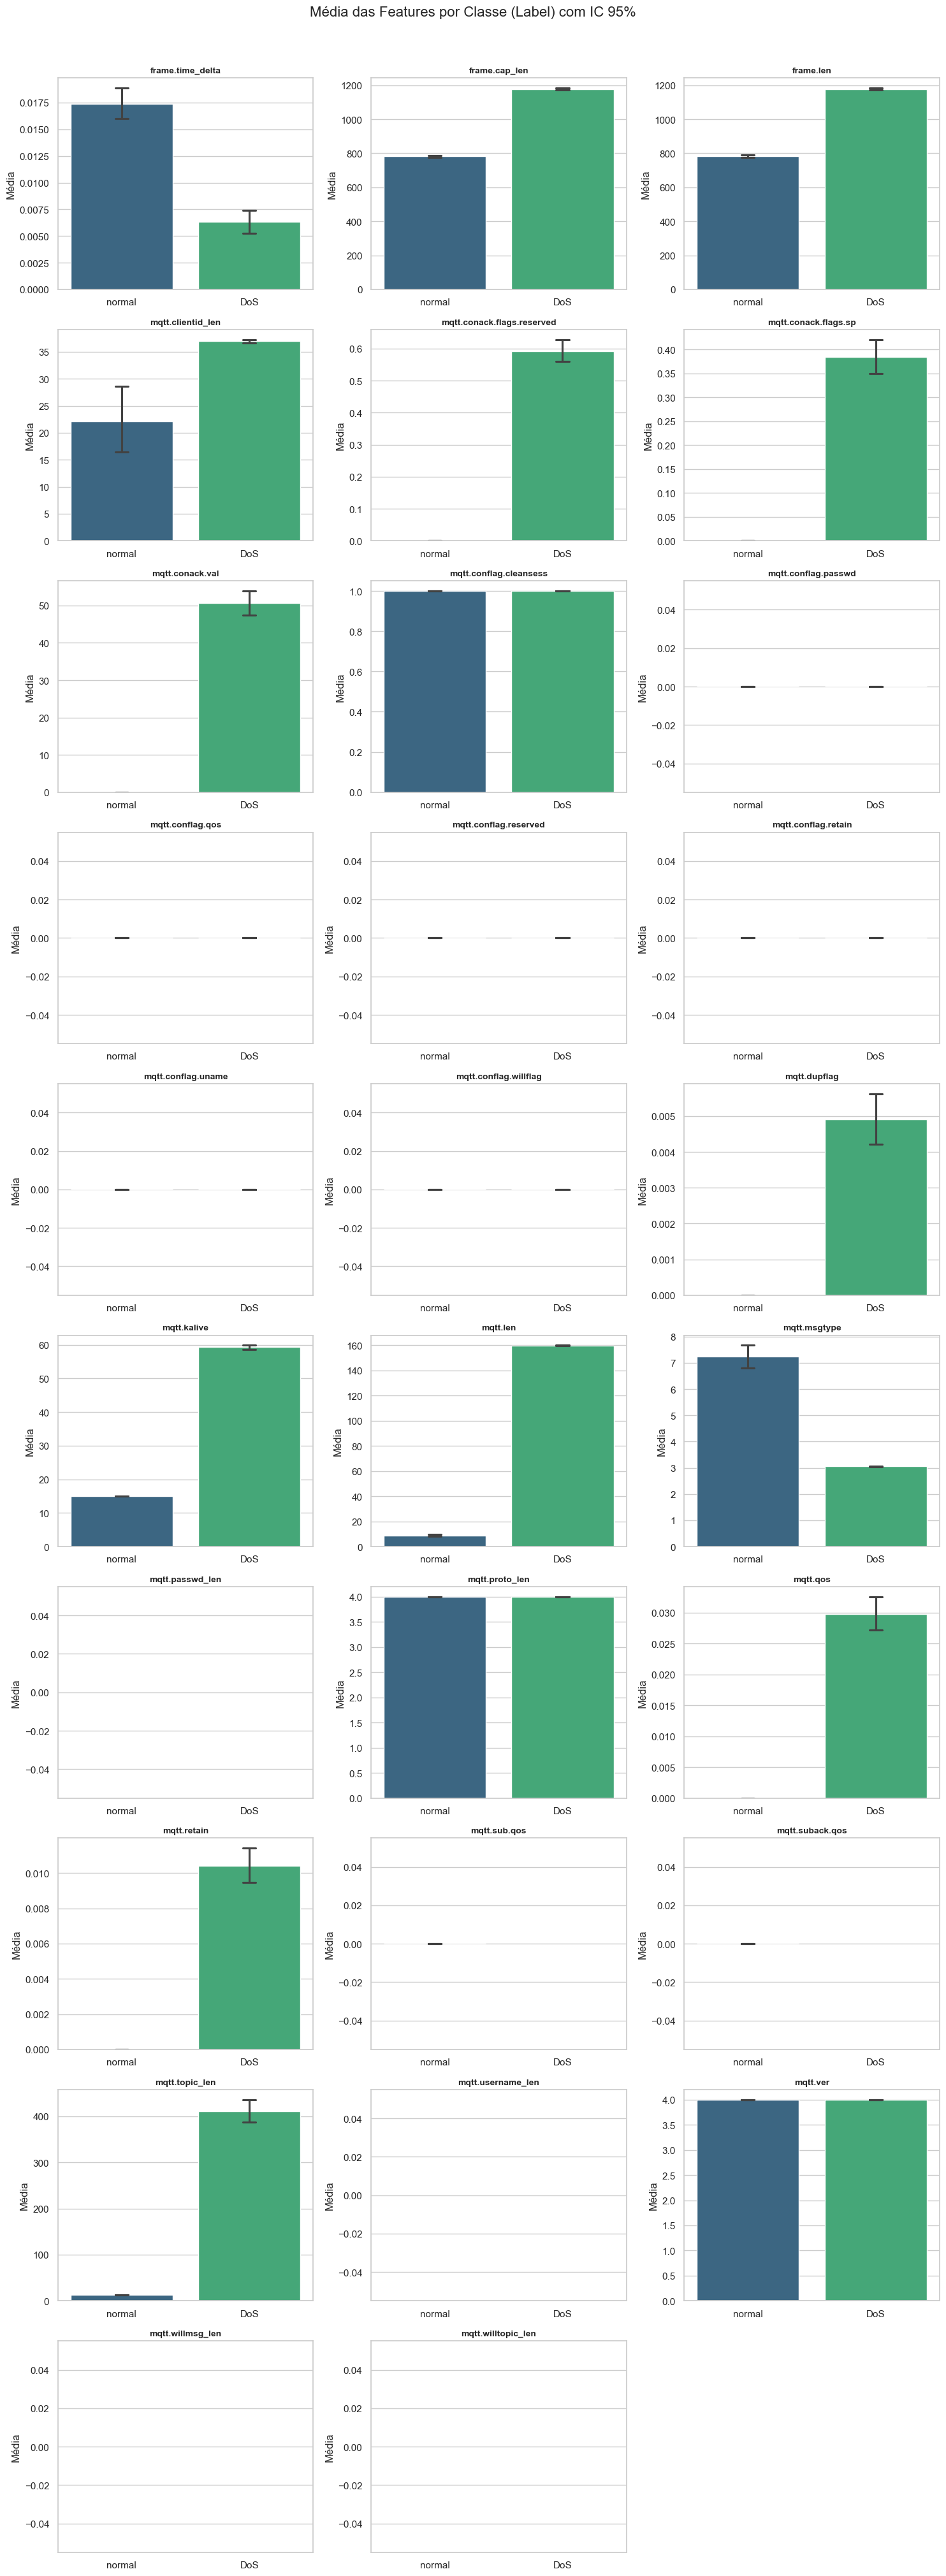

In [13]:
def gerar_plots_comparativos(df, col_classe='Label'):
    """
    Gera um grid de gráficos de barras comparando a média das features
    entre as classes (ex: Normal vs Ataque) com Intervalo de Confiança de 95%.
    """
    
    
    sns.set_theme(style="whitegrid")
    
    
    features = [col for col in df.columns if col != col_classe]
    n_features = len(features)
    
    
    ncols = 3
    nrows = math.ceil(n_features / ncols)
    
     
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, nrows * 4))
    axes = axes.flatten() 

    print(f"Gerando gráficos para {n_features} features...")

   
    for i, feature in enumerate(features):
        ax = axes[i]
        
        try:
          
            sns.barplot(
                data=df, 
                x=col_classe, 
                y=feature, 
                ax=ax, 
                palette="viridis",  
                capsize=0.1,        
                errorbar=('ci', 95) 
            )
            
            
            ax.set_title(feature, fontweight='bold', fontsize=10)
            ax.set_ylabel("Média")
            ax.set_xlabel("") 
            
        except Exception as e:
            ax.text(0.5, 0.5, f"Erro ao plotar:\n{str(e)}", ha='center', va='center')

   
    for i in range(n_features, len(axes)):
        fig.delaxes(axes[i])

    
    plt.suptitle(f"Média das Features por Classe ({col_classe}) com IC 95%", fontsize=16, y=1.01)
    plt.tight_layout()
    plt.show()

gerar_plots_comparativos(num_df2, col_classe='Label')

## Retirando as colunas (variáveis) com variância zero(as que os gráficos estão em branco)

In [16]:
colunas_para_remover2 = [col for col in num_df2.columns if num_df2[col].nunique() <=1]
print(colunas_para_remover2)

['mqtt.conflag.cleansess', 'mqtt.conflag.passwd', 'mqtt.conflag.qos', 'mqtt.conflag.reserved', 'mqtt.conflag.retain', 'mqtt.conflag.uname', 'mqtt.conflag.willflag', 'mqtt.passwd_len', 'mqtt.proto_len', 'mqtt.sub.qos', 'mqtt.suback.qos', 'mqtt.username_len', 'mqtt.ver', 'mqtt.willmsg_len', 'mqtt.willtopic_len']


### Criando uma coluna num_df3, que vai ser uma num_df2 mas sem as colunas com zero variância

In [17]:
num_df3 = num_df2.drop(columns=colunas_para_remover2)
num_df3['Label'] = df['type']
print("Colunas agora:", num_df3.columns)

Colunas agora: Index(['frame.time_delta', 'frame.cap_len', 'frame.len', 'mqtt.clientid_len',
       'mqtt.conack.flags.reserved', 'mqtt.conack.flags.sp', 'mqtt.conack.val',
       'mqtt.dupflag', 'mqtt.kalive', 'mqtt.len', 'mqtt.msgtype', 'mqtt.qos',
       'mqtt.retain', 'mqtt.topic_len', 'Label'],
      dtype='object')


### Iniciando o tratamento de Outliers com IQR no frame.time.delta

In [ ]:
Q1 = num_df3['frame.time_delta'].quantile(0.25)
Q3 = num_df3['frame.time_delta'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [21]:
num_df3_clean = num_df3[
    (num_df3['frame.time_delta'] >= lower_bound) & 
    (num_df3['frame.time_delta'] <= upper_bound)
]

In [22]:
print("Antes do filtro" , len(num_df3))
print("Depois do filtro", len(num_df3_clean))

Antes do filtro 94625
Depois do filtro 79851


# Chamando a função de gerar os gráficos após o tratamento dos dados

Gerando gráficos para 14 features...


C:\Users\samue\AppData\Local\Temp\ipykernel_21288\2346485350.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\samue\AppData\Local\Temp\ipykernel_21288\2346485350.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\samue\AppData\Local\Temp\ipykernel_21288\2346485350.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\samue\AppData\Local\Temp\ipykernel_21288\2346485350.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `h

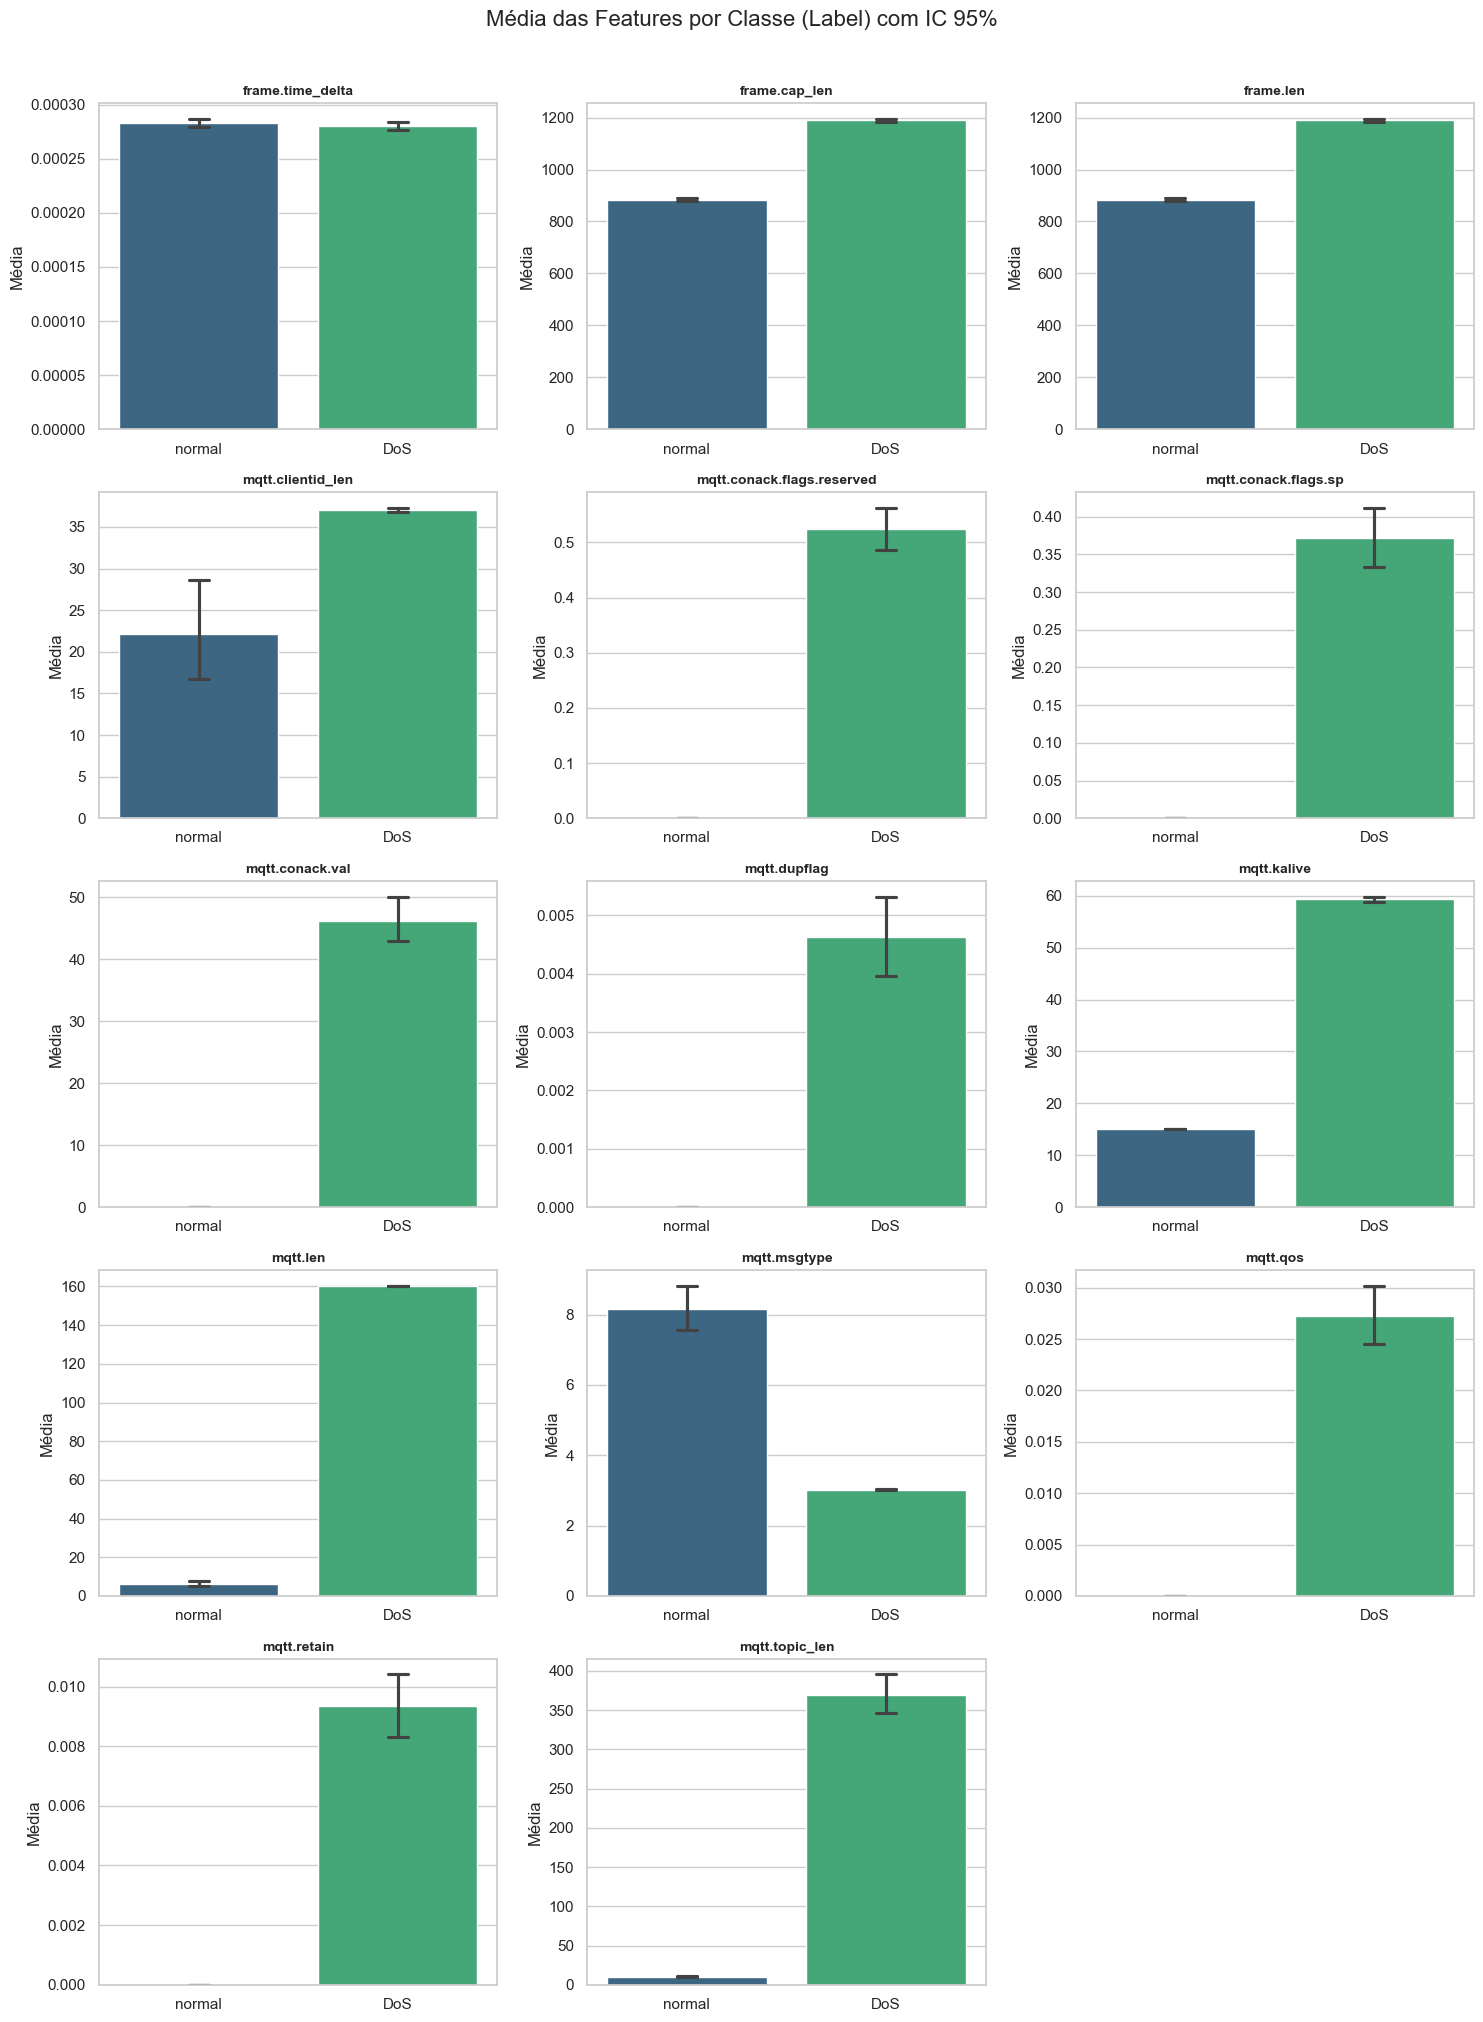

In [23]:
gerar_plots_comparativos(num_df3_clean, col_classe='Label')